In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
import sklearn.metrics as metrics
from sklearn.datasets import make_circles
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

In [ ]:

X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

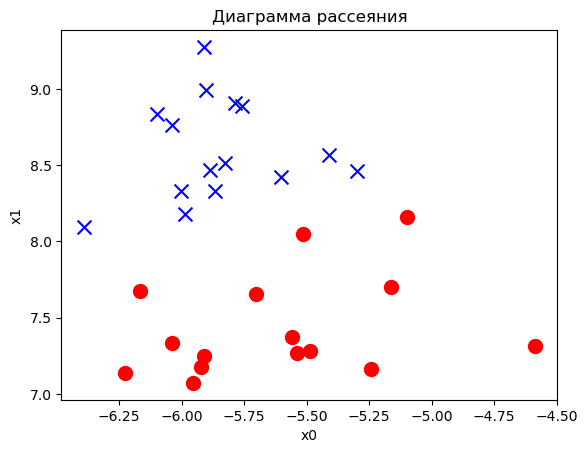

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [ ]:
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

In [ ]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [ ]:
svm_linear.intercept_

array([-64.2533988])

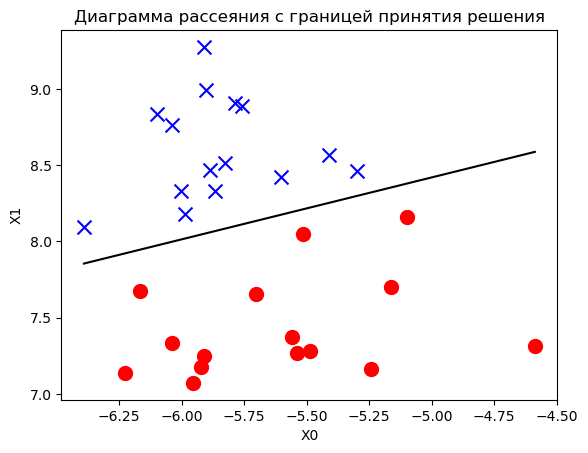

In [ ]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_linear.support_vectors_

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [ ]:
svm_linear.support_

array([ 0,  8, 29])

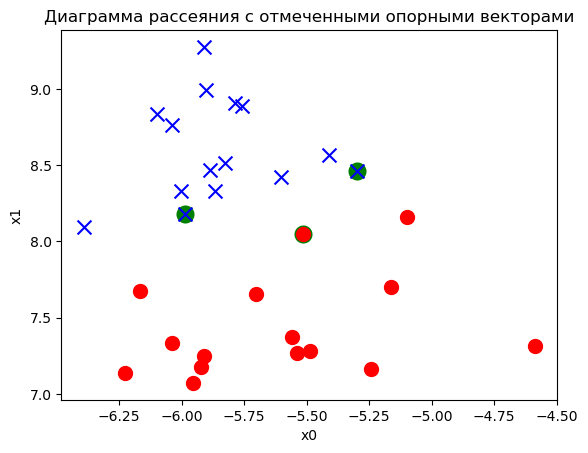

In [ ]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

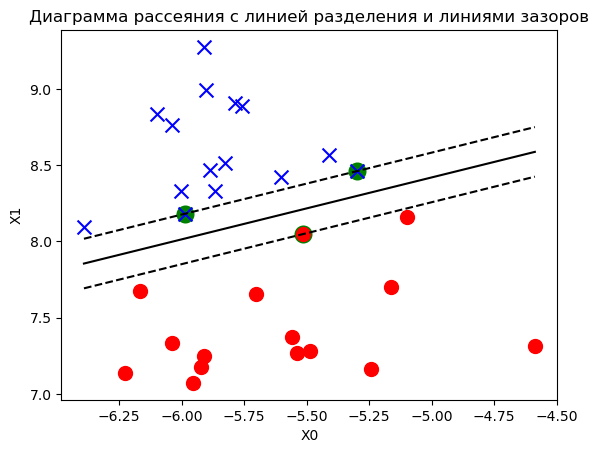

In [ ]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

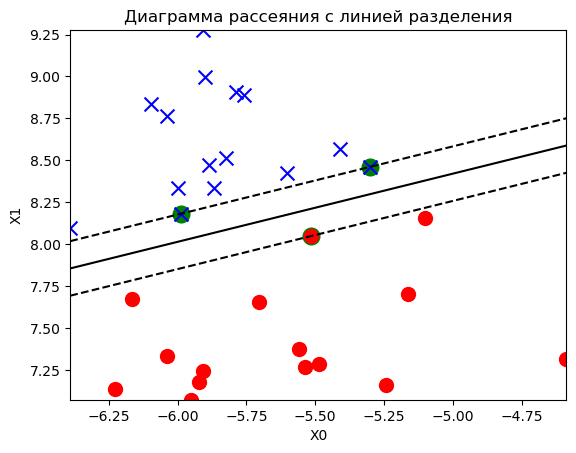

In [ ]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

In [ ]:
y_pred =  svm_linear.predict(X)

In [ ]:
metrics.accuracy_score(y, y_pred)

1.0

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]], dtype=int64)

In [ ]:
observation_new = [[-5.25, 7.5]]

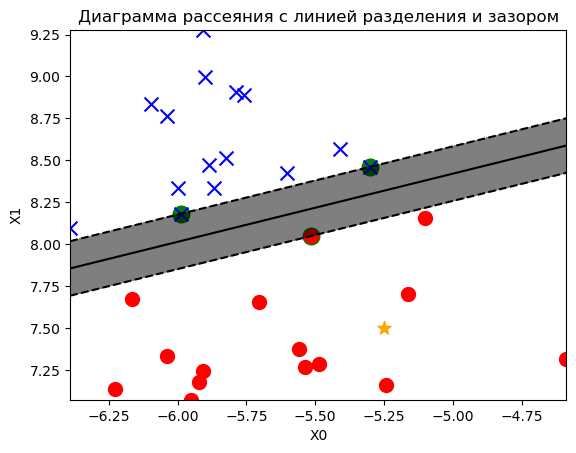

In [ ]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [ ]:
svm_linear.decision_function(observation_new)

array([-5.03131797])

In [ ]:
svm_linear.predict(observation_new)

array([0])

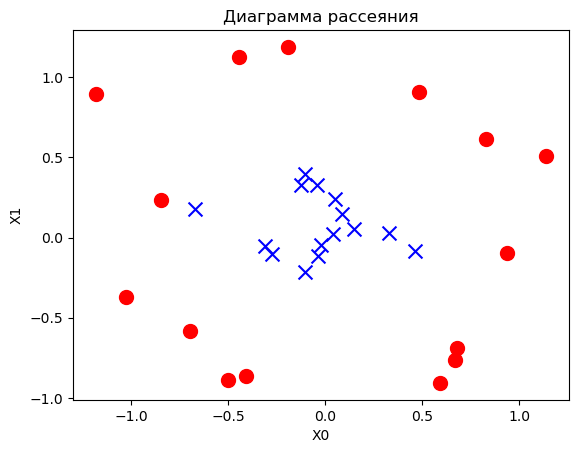

In [ ]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

In [ ]:
svm_rbf.n_support_
svm_rbf.support_
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

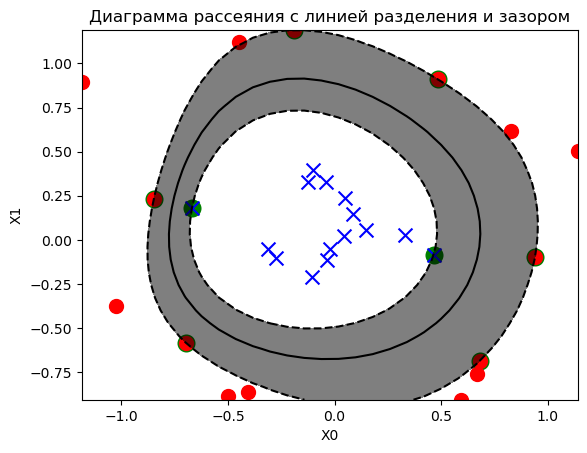

In [ ]:
plot_decision_regions(X, y, svm_rbf)

In [ ]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[7, 8],
       [8, 7]], dtype=int64)

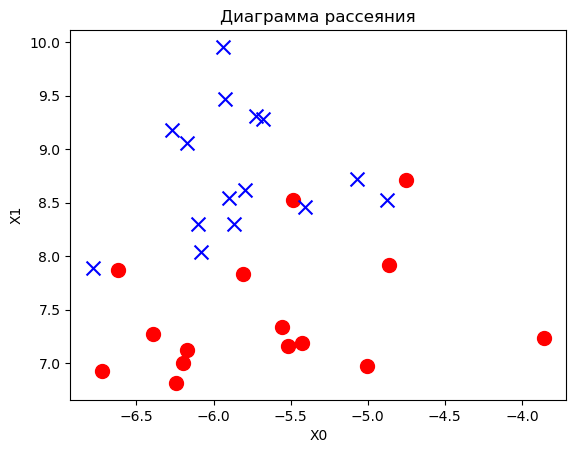

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)

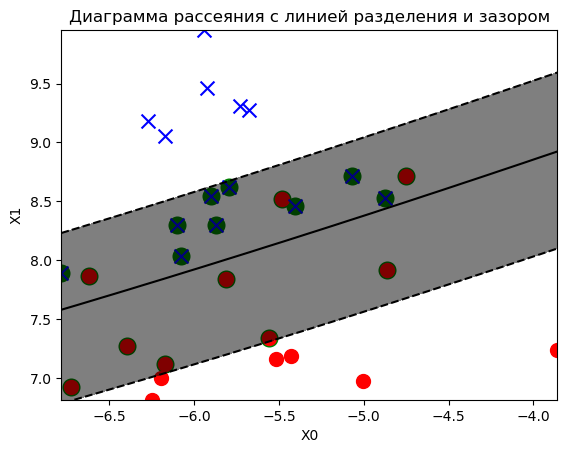

In [ ]:
plot_decision_regions(X, y, svm_poly)

In [ ]:
svm_poly.n_support_

array([9, 9])

In [ ]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]], dtype=int64)

# №1 В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.


In [ ]:
X,y= make_blobs(n_features=2,n_samples=20,centers=2, random_state=5, cluster_std=0.4)
svm_liner=SVC(kernel='linear' , C=10)
svm_liner.fit(X,y)

SVC(C=10, kernel='linear')

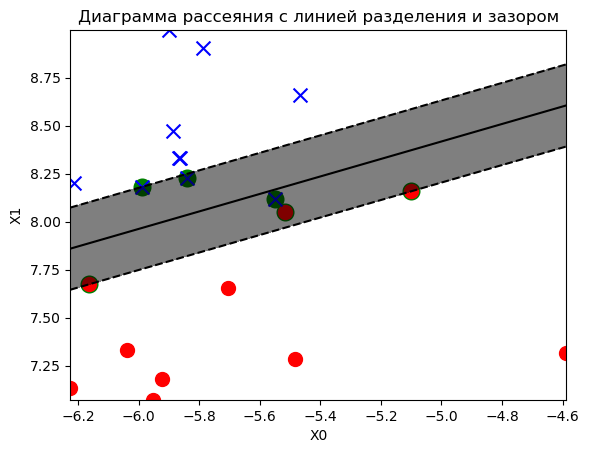

In [ ]:
plot_decision_regions(X,y,svm_liner)

# №2 В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?

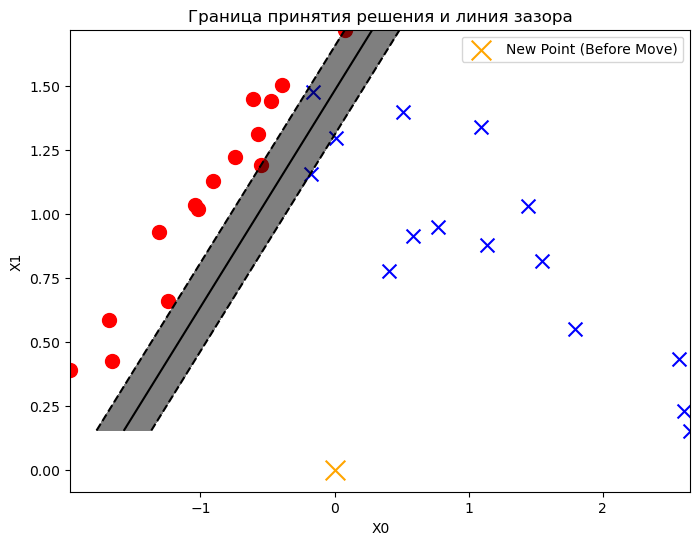

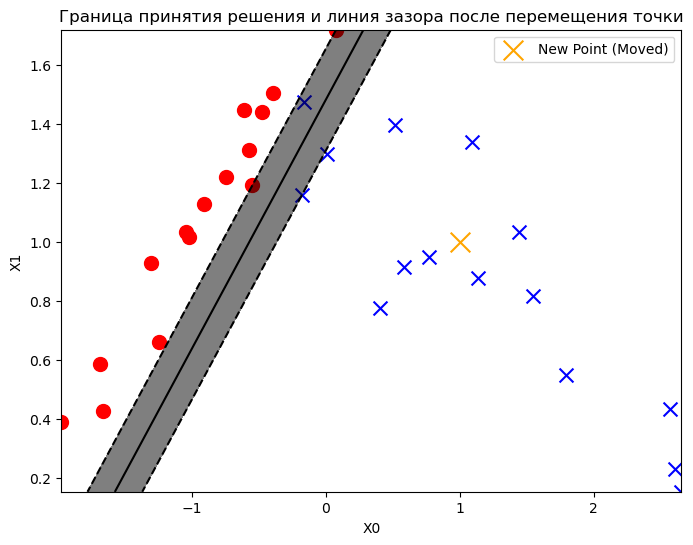

Предсказание до перемещения: 1
Предсказание после перемещения: 1


In [ ]:
# Генерация линейно разделимого датасета для классификации
X, y = make_classification(n_samples=30, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Обучение опорно-векторного классификатора без ядра с параметром C=100
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

# Визуализация границы решения и линии зазора
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c='r', s=100)  # Визуализация точек класса 0
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c='b', s=100)  # Визуализация точек класса 1

# Создание равномерно распределенных значений для X0 и X1
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

# Создание координатных матриц X0_grid и X1_grid с использованием meshgrid
X0_grid, X1_grid = np.meshgrid(X0, X1)

# Вычисление значений решающей функции для каждой точки в координатной сетке
Z = svm_linear.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)

# Отображение контуров решающей функции
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

# Закрашивание областей между контурами решающей функции
plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)


plt.title("Граница принятия решения и линия зазора")
plt.xlabel('X0')
plt.ylabel('X1')

# Выбор произвольной точки для нового предсказания
new_point = np.array([[0, 0]])

# Предсказание для выбранной точки
prediction_before_move = svm_linear.predict(new_point)

# Вывод информации о точке и её предсказании
plt.scatter(new_point[:, 0], new_point[:, 1], marker='x', s=200, color='orange', label='New Point (Before Move)')
plt.legend()

plt.show()

# Перемещение точки в другое место (попробуйте разные значения)
new_point_moved = np.array([[1, 1]])

# Предсказание для перемещенной точки
prediction_after_move = svm_linear.predict(new_point_moved)

# Визуализация границы решения после перемещения точки
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c='b', s=100)

# Вывод границы решения
Z = svm_linear.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

# Вывод информации о перемещенной точке и её предсказании
plt.scatter(new_point_moved[:, 0], new_point_moved[:, 1], marker='x', s=200, color='orange', label='New Point (Moved)')
plt.legend()

plt.title("Граница принятия решения и линия зазора после перемещения точки")
plt.xlabel('X0')
plt.ylabel('X1')

plt.show()

# Вывод предсказаний
print(f"Предсказание до перемещения: {prediction_before_move[0]}")
print(f"Предсказание после перемещения: {prediction_after_move[0]}")


# №3 Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.

C:\Users\nikol\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
C:\Users\nikol\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
C:\Users\nikol\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


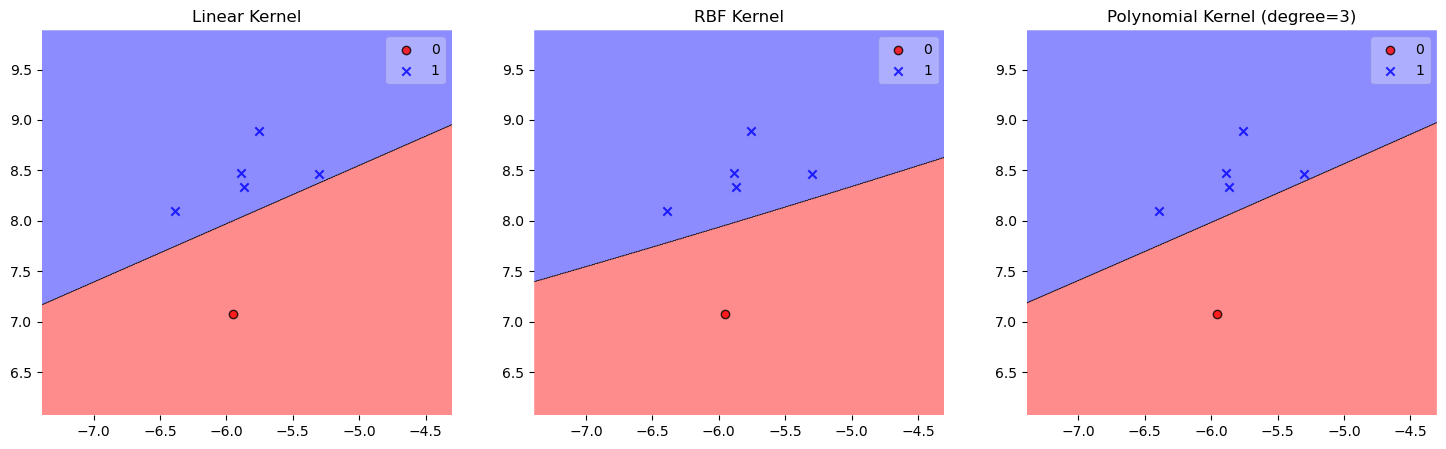

Accuracy (Linear Kernel): 1.0
Accuracy (RBF Kernel): 1.0
Accuracy (Polynomial Kernel): 1.0


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
# Генерация линейно разделимого датасета
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

# Разделение на тренировочный и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Линейное ядро
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X_train, y_train)

# Радиальное базисное ядро
svm_rbf = SVC(kernel='rbf', C=100)
svm_rbf.fit(X_train, y_train)

# Ядро с полиномиальной функцией
svm_poly = SVC(kernel='poly', degree=3, C=100)
svm_poly.fit(X_train, y_train)

# Визуализация границ решения и линий зазоров для всех трех ядер
plt.figure(figsize=(18, 5))

plt.subplot(131)
plot_decision_regions(X_test, y_test, clf=svm_linear, markers=['o', 'x'], colors='red,blue')
plt.title("Linear Kernel")

plt.subplot(132)
plot_decision_regions(X_test, y_test, clf=svm_rbf, markers=['o', 'x'], colors='red,blue')
plt.title("RBF Kernel")

plt.subplot(133)
plot_decision_regions(X_test, y_test, clf=svm_poly, markers=['o', 'x'], colors='red,blue')
plt.title("Polynomial Kernel (degree=3)")

plt.show()

# Оценка точности моделей
linear_accuracy = metrics.accuracy_score(y_test, svm_linear.predict(X_test))
rbf_accuracy = metrics.accuracy_score(y_test, svm_rbf.predict(X_test))
poly_accuracy = metrics.accuracy_score(y_test, svm_poly.predict(X_test))

print(f"Accuracy (Linear Kernel): {linear_accuracy}")
print(f"Accuracy (RBF Kernel): {rbf_accuracy}")
print(f"Accuracy (Polynomial Kernel): {poly_accuracy}")
